In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r'/Users/nehakundaliya/Downloads/archive (3).zip')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.shape

(13320, 9)

In [7]:
df1 = df[['area_type','location','size','total_sqft','bath','price']]
df1.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df1.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

As we have lot of data and missing values are less, so we can remove them

In [9]:
df2 = df1.dropna()

In [10]:
df2.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2410
Carpet  Area              87
Plot  Area              2009
Super built-up  Area    8740
Name: area_type, dtype: int64

In [11]:
df2['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [12]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df3 = df2.copy()
df3['BHK'] = df2['size'].apply(lambda x: int(x.split()[0]))
df3.head(3)

,area_type,location,size,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3


In [15]:
df3.drop('size',axis='columns',inplace=True)

In [16]:
df3.head()

,area_type,location,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,51.00,2


In [17]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def is_float(x):
    try:
        float(x)
    except ValueError:
        print(x)

In [19]:
df3['total_sqft'].apply(is_float)

2100 - 2850
3067 - 8156
1042 - 1105
1145 - 1340
1015 - 1540
34.46Sq. Meter
1195 - 1440
4125Perch
1120 - 1145
3090 - 5002
1160 - 1195
1000Sq. Meter
1115 - 1130
1100Sq. Yards
520 - 645
1000 - 1285
650 - 665
633 - 666
5.31Acres
30Acres
1445 - 1455
884 - 1116
850 - 1093
716Sq. Meter
547.34 - 827.31
580 - 650
3425 - 3435
1804 - 2273
3630 - 3800
4000 - 5249
1500Sq. Meter
142.61Sq. Meter
1574Sq. Yards
1250 - 1305
670 - 980
1005.03 - 1252.49
3630 - 3800
1004 - 1204
361.33Sq. Yards
645 - 936
2710 - 3360
2830 - 2882
596 - 804
1255 - 1863
1300 - 1405
117Sq. Yards
934 - 1437
980 - 1030
2249.81 - 4112.19
1070 - 1315
3040Sq. Meter
500Sq. Yards
2806 - 3019
613 - 648
704 - 730
1210 - 1477
3369 - 3464
1125 - 1500
167Sq. Meter
1076 - 1199
381 - 535
524 - 894
540 - 670
315Sq. Yards
2725 - 3250
888 - 1290
660 - 700
385 - 440
770 - 841
524 - 894
3Cents
188.89Sq. Yards
1469 - 1766
204Sq. Meter
1255 - 1350
870 - 1080
45Sq. Yards
133.3Sq. Yards
2580 - 2591
613 - 648
2563 - 2733
605 - 624
1349 - 3324
78.03Sq. 

0        None
1        None
2        None
3        None
4        None
         ... 
13315    None
13316    None
13317    None
13318    None
13319    None
Name: total_sqft, Length: 13246, dtype: object

In [20]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [21]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4.head()

,area_type,location,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2


In [22]:
df4['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [23]:
df4.shape

(13246, 6)

In [24]:
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,area_type,location,total_sqft,bath,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [25]:
df5 = df4[df4['total_sqft']/df4['BHK']>=300]

In [26]:
df5.shape

(12456, 7)

In [27]:
df5['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [28]:
# You can replace the threshold value as needed
threshold = 10

# Get the location counts and sort them in descending order
location_counts = df5.groupby('location')['location'].count().sort_values(ascending=False).reset_index(name='count')

# Filter locations with count less than the threshold
locations_to_replace = location_counts[location_counts['count'] < threshold]['location'].tolist()

# Replace those locations with 'Other'
df5.loc[df5['location'].isin(locations_to_replace), 'location'] = 'Other'

df5.head()

,area_type,location,total_sqft,bath,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [29]:
df5.shape

(12456, 7)

In [30]:
def loc(df):
    df1 = pd.DataFrame()
    for a, b in df.groupby('area_type'):
        for c,d in b.groupby('location'):
            mean = np.mean(d.price_per_sqft)
            std = np.std(d.price_per_sqft)
            ab = d[(d.price_per_sqft <= mean + std) & (d.price_per_sqft >= mean - std)]
            df1 = pd.concat([df1, ab])
    return df1

In [31]:
loc(df5)

,area_type,location,total_sqft,bath,price,BHK,price_per_sqft
9894,Built-up Area,Devarachikkanahalli,1116.0,2.0,47.00,2,4211.469534
7138,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.00,3,10833.333333
2055,Built-up Area,1st Block Koramangala,1415.0,2.0,110.00,2,7773.851590
7271,Built-up Area,1st Block Koramangala,860.0,2.0,65.50,2,7616.279070
2292,Built-up Area,1st Phase JP Nagar,1500.0,5.0,85.00,5,5666.666667
...,...,...,...,...,...,...,...
12489,Super built-up Area,Yeshwanthpur,1160.0,2.0,64.08,2,5524.137931
12627,Super built-up Area,Yeshwanthpur,1676.0,3.0,92.13,3,5497.016706
12850,Super built-up Area,Yeshwanthpur,2503.0,3.0,138.00,3,5513.383939
13017,Super built-up Area,Yeshwanthpur,1855.0,3.0,135.00,3,7277.628032


In [32]:
df6 = loc(df5)



In [33]:
df6.shape

(9509, 7)

In [34]:
df7 = df6[df6['bath']<=df6['BHK']+2]

In [35]:
df7.shape

(9504, 7)

In [36]:
def plot_scatter_chart(df1, location):
        for dc,df in df1.groupby('location'):
            if dc == location:
                bhk2 = df[df.BHK == 2]
                bhk3 = df[df.BHK == 3]
                plt.rcParams['figure.figsize'] = (15, 10)
                plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
                plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
                plt.xlabel("Total Square Feet Area")
                plt.ylabel("Price (Lakh Indian Rupees)")
                plt.title(f"Scatter Plot for {location}")
                plt.legend()
                plt.show()

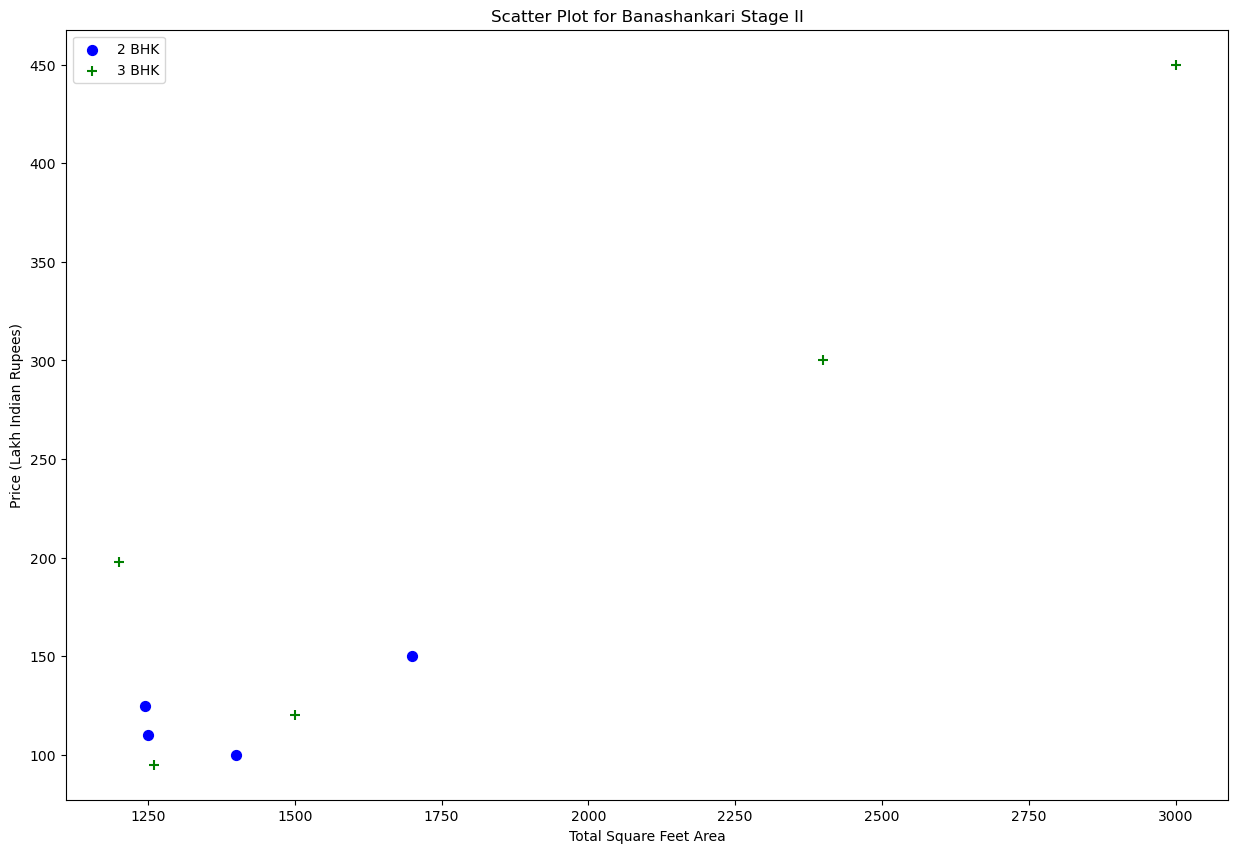

In [37]:
plot_scatter_chart(df7,'Banashankari Stage II')

In [38]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)

In [39]:
df8.shape

(6642, 7)

In [40]:
dummy = pd.get_dummies(df8['area_type'])
dummy

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
9894,1,0,0,0
7138,1,0,0,0
2055,1,0,0,0
7271,1,0,0,0
2292,1,0,0,0
...,...,...,...,...
10142,0,0,0,1
10608,0,0,0,1
10874,0,0,0,1
11785,0,0,0,1


In [41]:
dummy.columns

Index(['Built-up  Area', 'Carpet  Area', 'Plot  Area', 'Super built-up  Area'], dtype='object')

In [42]:
dummy.drop('Super built-up  Area',axis='columns',inplace=True)

In [43]:
df9 = pd.concat([df8,dummy],axis='columns')

In [44]:
df9.head()

,area_type,location,total_sqft,bath,price,BHK,price_per_sqft,Built-up Area,Carpet Area,Plot Area
9894,Built-up Area,Devarachikkanahalli,1116.0,2.0,47.0,2,4211.469534,1,0,0
7138,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333,1,0,0
2055,Built-up Area,1st Block Koramangala,1415.0,2.0,110.0,2,7773.851590,1,0,0
7271,Built-up Area,1st Block Koramangala,860.0,2.0,65.5,2,7616.279070,1,0,0
2292,Built-up Area,1st Phase JP Nagar,1500.0,5.0,85.0,5,5666.666667,1,0,0


In [45]:
dummy2= pd.get_dummies(df9['location'])
dummy2.head(2)

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
9894,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
dummy2.drop('Other',axis='columns',inplace=True)

In [47]:
df10=pd.concat([df9,dummy2],axis='columns')

In [48]:
df10.head()

,area_type,location,total_sqft,bath,price,BHK,price_per_sqft,Built-up Area,Carpet Area,Plot Area,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
9894,Built-up Area,Devarachikkanahalli,1116.0,2.0,47.0,2,4211.469534,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2055,Built-up Area,1st Block Koramangala,1415.0,2.0,110.0,2,7773.851590,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7271,Built-up Area,1st Block Koramangala,860.0,2.0,65.5,2,7616.279070,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2292,Built-up Area,1st Phase JP Nagar,1500.0,5.0,85.0,5,5666.666667,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df11 = df10.drop(['area_type','location','price_per_sqft'],axis='columns')

In [50]:
df11.shape

(6642, 244)

In [51]:
df11.head(3)

,total_sqft,bath,price,BHK,Built-up Area,Carpet Area,Plot Area,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
9894,1116.0,2.0,47.0,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1200.0,2.0,130.0,3,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2055,1415.0,2.0,110.0,2,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# MODELLING

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [53]:
X = df11.drop('price',axis='columns')
Y = df11['price']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=3)

In [55]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [56]:
model.score(X_test,y_test)

0.8118273409254719

In [57]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.74626923, 0.86445429, 0.79618236, 0.750029  , 0.76950598])

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [59]:
def model_selection_gridsearch(x,y):
    algo = {
        'linear':{
            'model':LinearRegression(),
            'params':{
                'fit_intercept': [True, False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
            'alpha': [1,2],
            'selection': ['random', 'cyclic']
        }
        
    },'decision_tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
        }
    }}
    score=[]
    cv =ShuffleSplit(n_splits=5, test_size=0.2, random_state=3)
    for a,b in algo.items():
        ab = GridSearchCV(b['model'],b['params'],cv=cv)
        ab.fit(x,y)
        score.append({
            'model': a,
            'best_score': ab.best_score_,
            'best_params': ab.best_params_
        })
    return pd.DataFrame(score,columns=['model','best_score','best_params'])


In [60]:
model_selection_gridsearch(X,Y)

/Users/nehakundaliya/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nehakundaliya/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nehakundaliya/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/Users/nehakundaliya/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File

,model,best_score,best_params
0,linear,0.796936,{'fit_intercept': True}
1,lasso,0.692401,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.638245,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [62]:
def predict_price(area, location, bhk,bath,sqft):
    # Create an array to represent the input features
    x = np.zeros(len(X.columns))
    
    # Set the values for 'sqft', 'bath', and 'bhk' (assuming 'sqft', 'bath', and 'bhk' are columns in your dataset)
    x[X.columns.get_loc('bath')] = bath
    x[X.columns.get_loc('bhk')] = BHK
    x[X.columns.get_loc('total_sqft')] = total_sqft
    
    # Check if the area is 'super' and set 'a' and 'b' columns accordingly
    if area == 'super':
        x[X.columns.get_loc('a')] = 0
        x[X.columns.get_loc('b')] = 0
    else:
        # Assuming 'a' and 'b' columns are present in your dataset
        x[X.columns.get_loc('a')] = 1  # Set 'a' column to 1 for the provided location
    
    # Use the trained model to predict the price
    predicted_price = lr_clf.predict([x])[0]
    
    return predicted_price

In [101]:
X.reset_index(drop=True, inplace=True)
X

,total_sqft,bath,BHK,Built-up Area,Carpet Area,Plot Area,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1116.0,2.0,2,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1200.0,2.0,3,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1415.0,2.0,2,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,860.0,2.0,2,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1500.0,5.0,5,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6637,1500.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6638,674.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6639,672.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6640,1692.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [134]:
def predict_price(area,location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    area_index=np.where(X.columns==area)[0][0]
    x = np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    x[loc_index]=1
    x[area_index]=1
    return model.predict([x])[0]

In [135]:
predict_price('Plot  Area',' Devarachikkanahalli',200,2,2)

/Users/nehakundaliya/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


23.04359982540761

In [136]:
import pickle
with open('linear_regression_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [137]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))